## Bank Churn Predictor

#### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

#### About this file
* Customer retention is a key focus for banks in ensuring the longevity of their business. ABC Multinational Bank, in particular, is keen on retaining its account holders. The objective here is to analyze the customer data of the bank's account holders with the ultimate goal of predicting and mitigating customer churn.

* Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.

#### 1) Problem statement
* This project Aims is to Predict the Customer Churn for ABC Bank..

#### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/rangalamahesh/bank-churn
* The data consists of 13 column and 165034 rows.

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [68]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [69]:
df_original = pd.read_csv('data/train.csv')
pd.set_option('display.max_columns', None)
df_original = df_original.rename(columns={'Exited':'Churn'})
df = df_original.copy()
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Shape of the dataset


In [70]:
df.shape

(165034, 14)

#### 2.2 About Dataset
This dataset is for ABC Multistate bank with following columns:

1. customer_id - unused variable.
2. credit_score - used as input.
3. country - used as input.
4. gender - used as input.
5. age - used as input.
6. tenure - used as input.
7. balance - used as input.
8. products_number - used as input.
9. credit_card - used as input.
10. active_member - used as input.
11. estimated_salary - used as input.
12. churn - used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.


#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [71]:
df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [72]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

There are no Null values in this dataset.

#### 3.2 Check Duplicates

In [73]:
df.duplicated().sum()

0

Since there are 30 duplicate values,we need to remove it.

In [74]:
df.drop_duplicates()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


#### 3.3 Check data types

In [75]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Churn            165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


#### 3.4 Checking the number of unique values of each column

In [76]:
df.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Churn                   2
dtype: int64

#### 3.5 Check statistics of data set

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


Removing `id`,`Surname` & `CustomerID` Column

In [78]:
df.drop('id',axis=1,inplace=True)
df.drop('Surname',axis=1,inplace=True)
df.drop('CustomerId',axis=1,inplace=True)

In [79]:
## Dividing features into numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical features : {}'.format(len(cat_cols), cat_cols))

We have 9 numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn']

We have 2 categorical features : ['Geography', 'Gender']


In [80]:
print("Categories Geography are :",end=" " )
print(df['Geography'].unique())

Categories Geography are : ['France' 'Spain' 'Germany']


In [81]:
print("Gender :",end=" " )
print(df['Gender'].unique())

Gender : ['Male' 'Female']


##### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

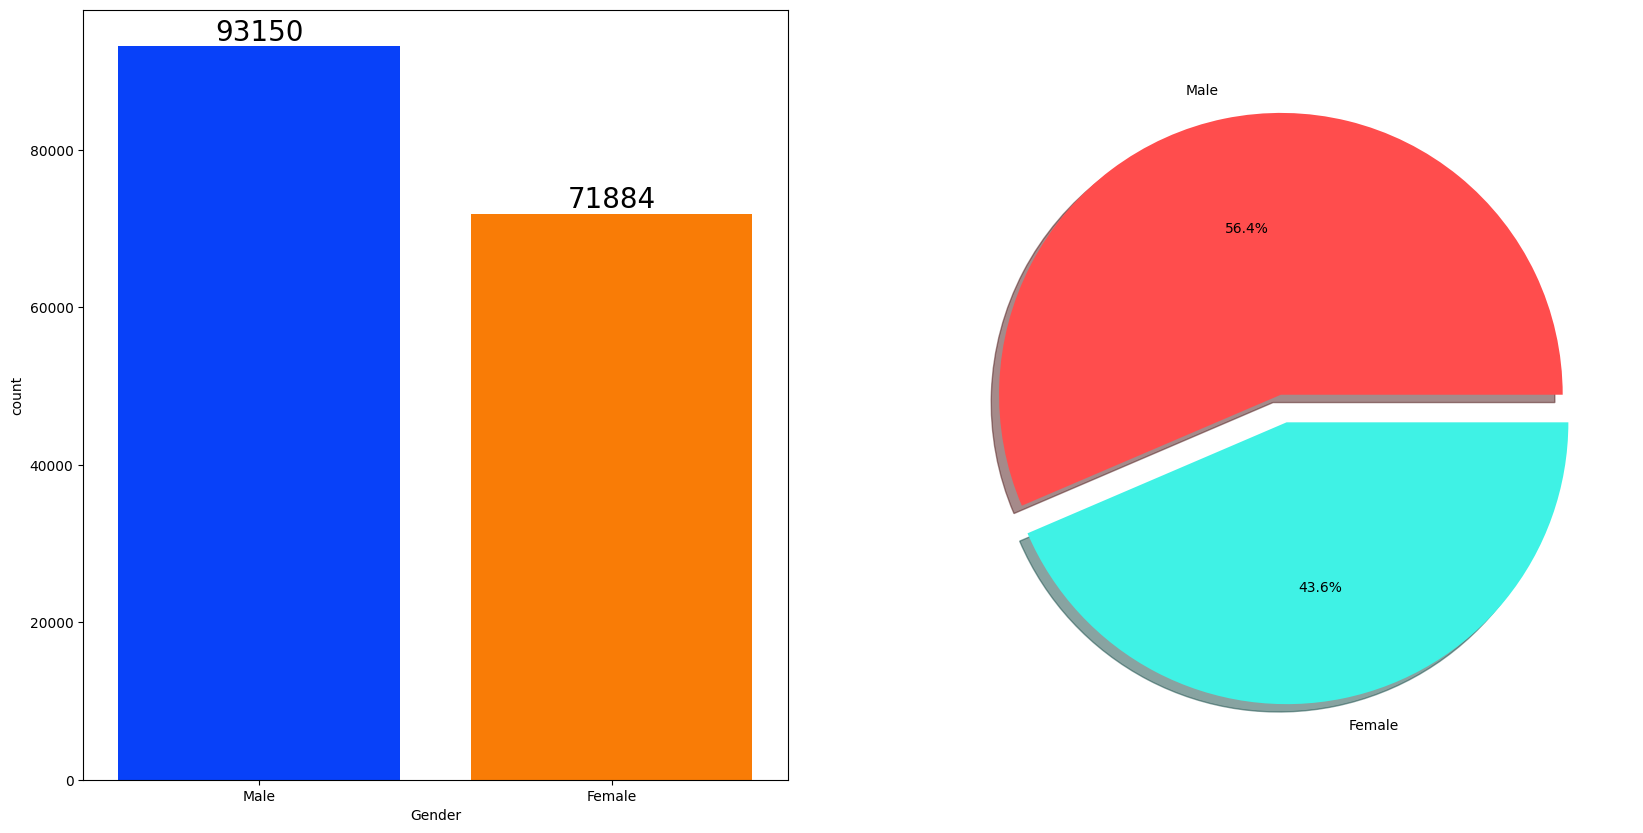

In [88]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#3ff2e5'])
plt.show()

* More Males have account in this Bank.

#### UNIVARIATE ANALYSIS ( How is distribution of Geography ? )

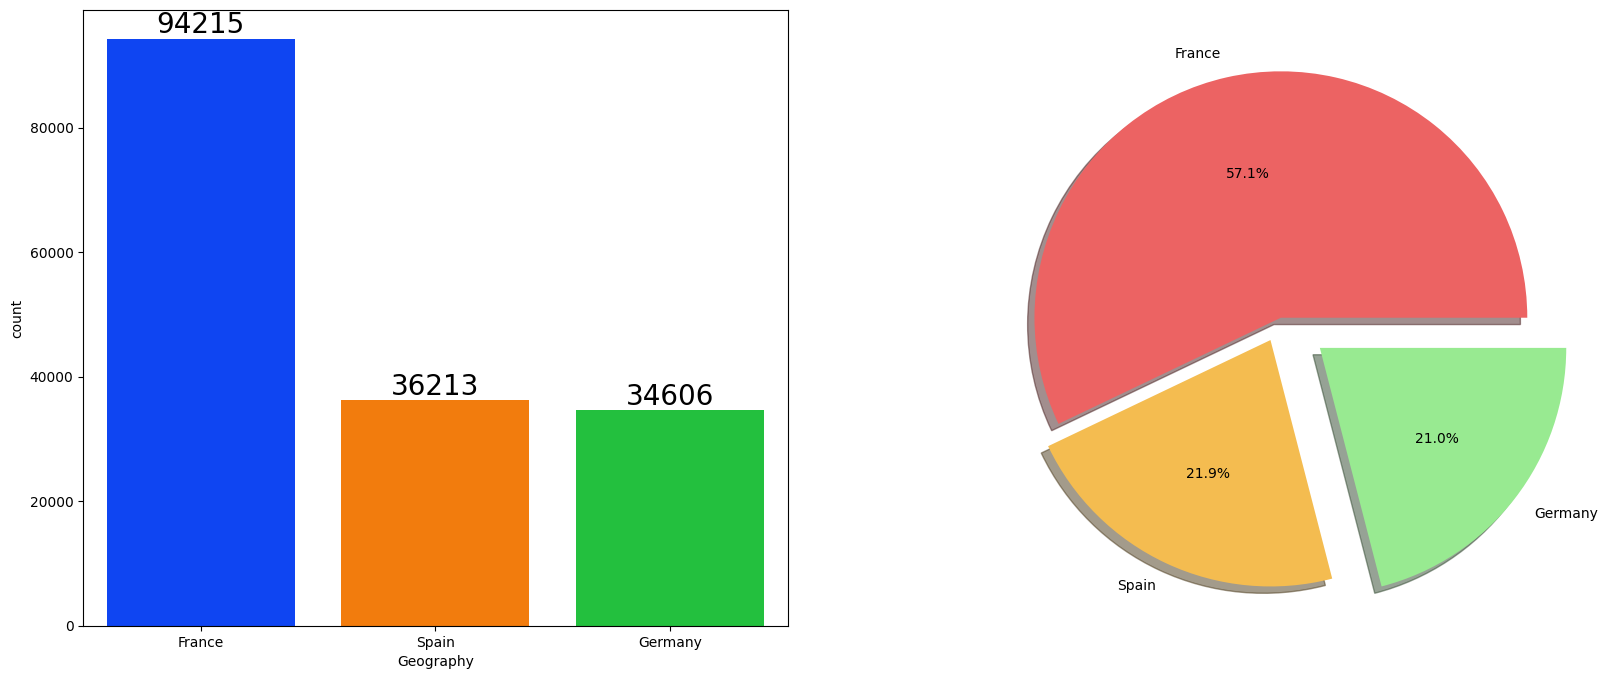

In [106]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['Geography'],data=df,palette="bright",ax=ax[0],saturation=0.90)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['Geography'].value_counts(),data=df,labels=['France','Spain','Germany'],explode=[0,0.1,0.2],autopct='%1.1f%%',shadow=True,colors=['#ec6363','#f4bc50','#98ea91'])
plt.show()

* France has most no. of bank accounts i.e. `57.1%`,followed by Spain(`21.9%`) and Germany(`21%`)

#### BIVARIATE ANALYSIS (Which country has most number of Active members and Have cards?)

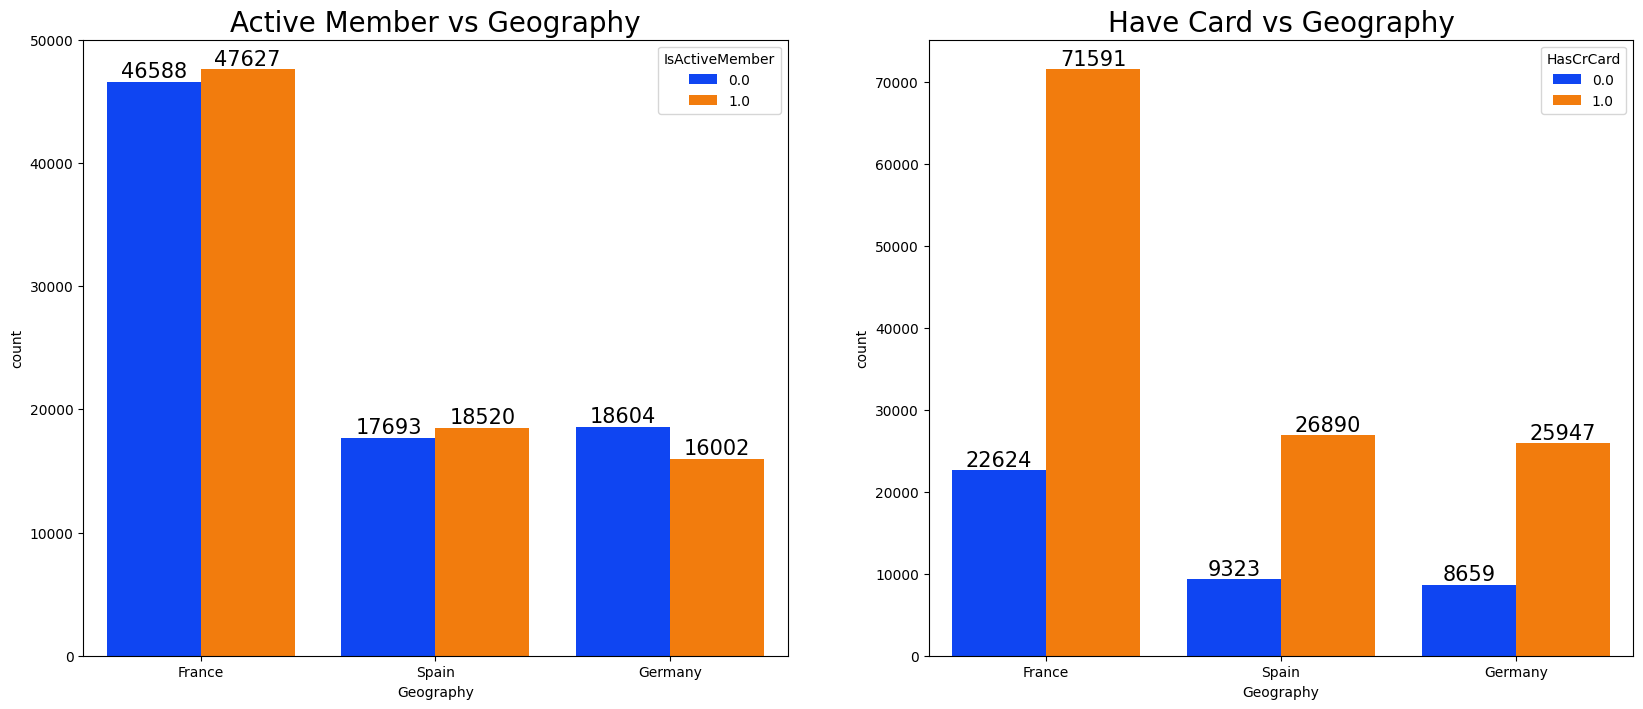

In [115]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['Geography'],data=df,palette='bright',hue='IsActiveMember',ax=ax[0],saturation=0.90)
ax[0].set_title('Active Member vs Geography',color='black',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)


sns.countplot(x=df['Geography'],data=df,palette = 'bright',hue='HasCrCard',ax=ax[1],saturation=0.90)
ax[1].set_title('Have Card vs Geography',color='black',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)


* France has most number of active members,followed by Spain and Germany 

In [116]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
